# Dataset Description

The Adult dataset is from the Census Bureau and the task is to a year based attributes such as education, hours of work per week, etc..

The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

Age

Workclass

Final Weight

Education

Education Number of Years

Marital-status

Occupation

Relationship

Race

Sex

Capital-gain

Capital-loss

Hours-per-week

Native-country

There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

The dataset contains missing values that are marked with a question mark character (?).

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats 

%matplotlib inline

In [10]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [5]:
category_column =['workclass', 'race', 'education','marital-status', 'occupation','relationship', 'gender', 'native-country']

In [6]:
numeric_column=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week']

In [7]:
df.workclass.replace('?',df.workclass.mode()[0],inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df.occupation.replace('?',df.occupation.mode()[0],inplace=True)

In [9]:
df['native-country'].replace('?',df['native-country'].mode()[0],inplace=True)

# Univariate Analysis

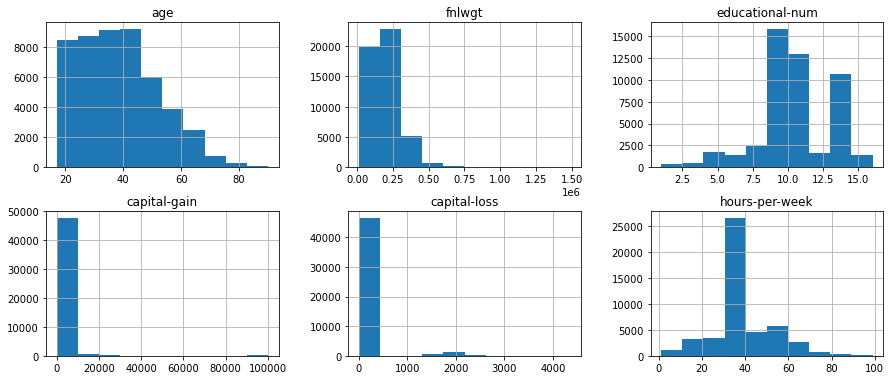

In [10]:
df[numeric_column].hist(figsize=(15, 20), layout=(6, 3));

<AxesSubplot:xlabel='age'>

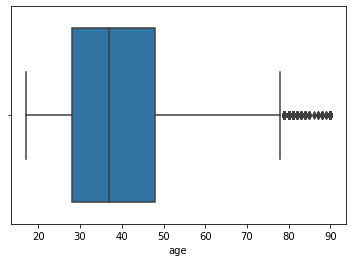

In [11]:
sns.boxplot(x='age',data=df)

<AxesSubplot:xlabel='fnlwgt'>

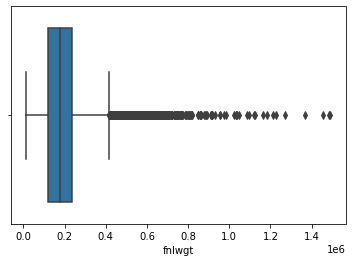

In [12]:
sns.boxplot(x='fnlwgt',data=df)

<b> from above graph we can see that there are lots of outliers in fnlwgt column </b>

<AxesSubplot:xlabel='educational-num'>

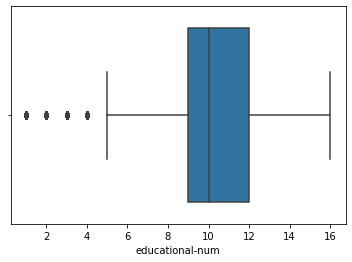

In [13]:
sns.boxplot(x='educational-num',data=df)

<b> here, few lower outliers in educational-num column as compare to previous one. </b> 

<AxesSubplot:xlabel='capital-gain'>

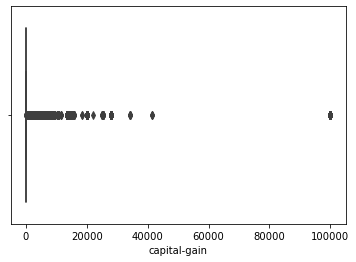

In [14]:
sns.boxplot(x='capital-gain',data=df)

<b> there are alot of outliers in capital-gain column <b>

<AxesSubplot:xlabel='capital-loss'>

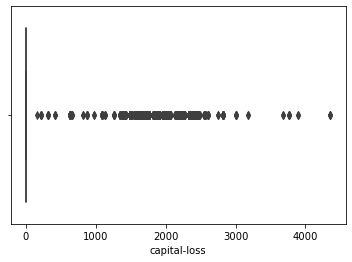

In [15]:
sns.boxplot(x='capital-loss',data=df)

<b> there are alot of outliers in capital-loss column </b>

<AxesSubplot:xlabel='hours-per-week'>

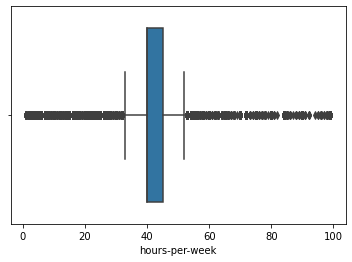

In [16]:
sns.boxplot(x='hours-per-week',data=df)

<b> here, we can see that the numerical features have very different ranges for that we need to normalize or standardize the data, and we need to convert categorical column into numeric using some encoding techniques or dummy variables </b>

<AxesSubplot:xlabel='workclass', ylabel='count'>

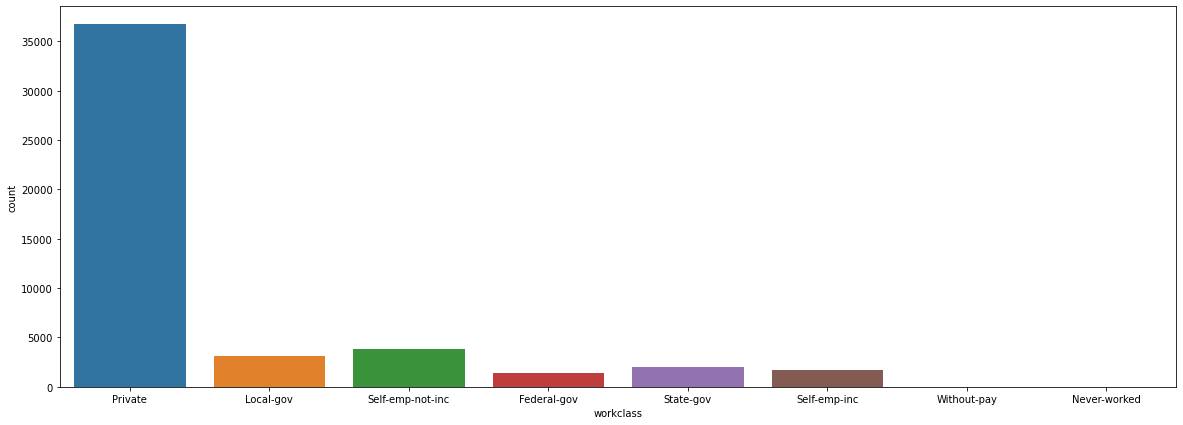

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(x='workclass',data=df)

<b> Here we can see that there are more people working in the private sector </b>

<AxesSubplot:xlabel='education', ylabel='count'>

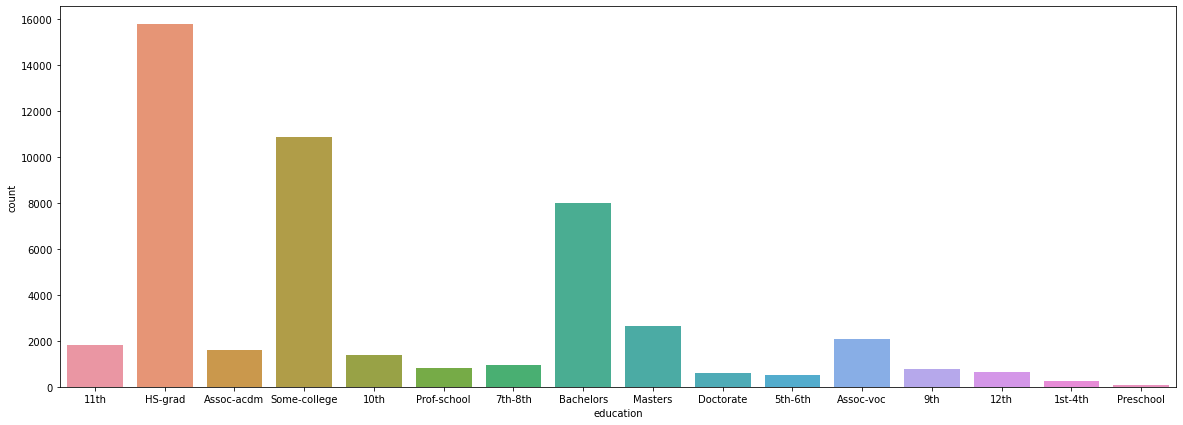

In [18]:
plt.figure(figsize=(20,7))
sns.countplot(x='education',data=df)

<b> here we can see that there are more people who have done hs grad </b>

<AxesSubplot:xlabel='marital-status', ylabel='count'>

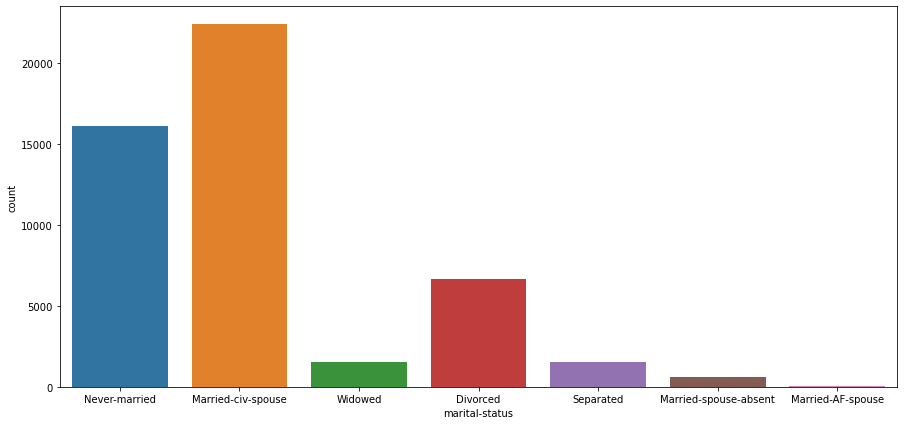

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='marital-status',data=df)

<AxesSubplot:xlabel='occupation', ylabel='count'>

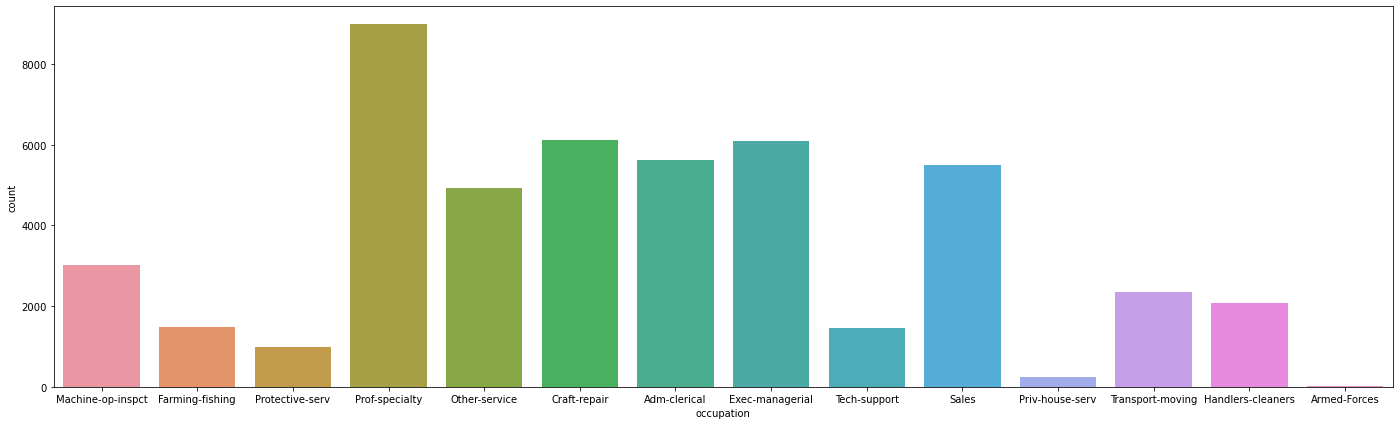

In [20]:
plt.figure(figsize=(24,7))
sns.countplot(x='occupation',data=df)

<AxesSubplot:xlabel='relationship', ylabel='count'>

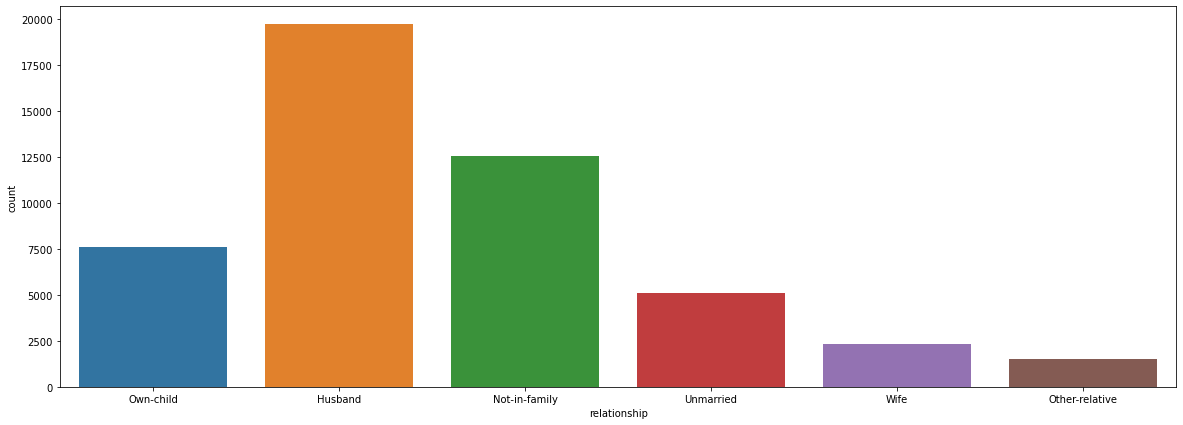

In [21]:
plt.figure(figsize=(20,7))
sns.countplot(x='relationship',data=df)

<b> here we can see that there are more husbands being listed </b>

<AxesSubplot:xlabel='race', ylabel='count'>

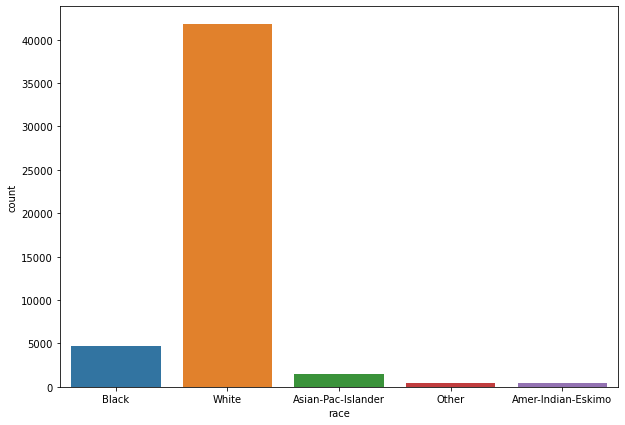

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(x='race',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

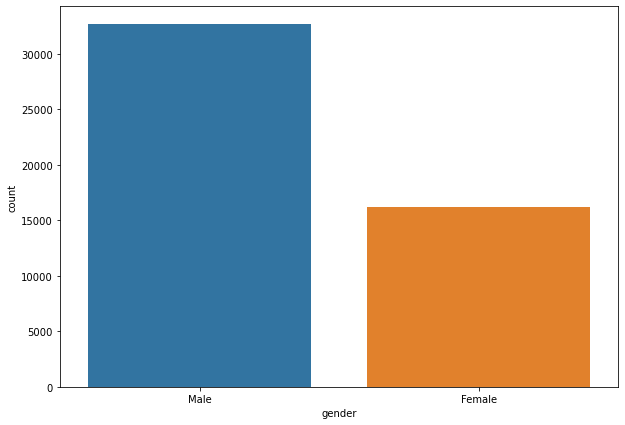

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

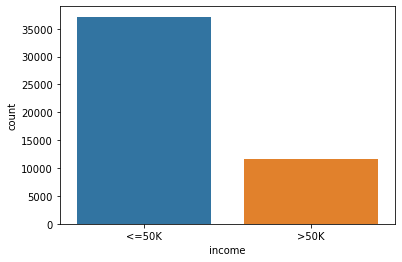

In [24]:
sns.countplot(x='income',data=df)

# Bivariate analysis


<AxesSubplot:xlabel='age', ylabel='income'>

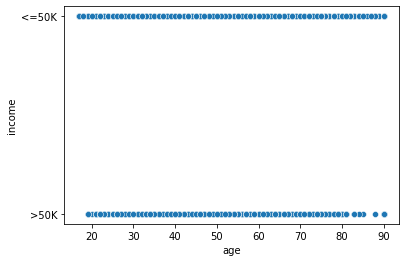

In [25]:
sns.scatterplot(x='age',y='income',data=df)

<b> we can see that there is nothing like as age increase salary increases. The people with lower age also has >50k salary</b>

<AxesSubplot:xlabel='educational-num', ylabel='income'>

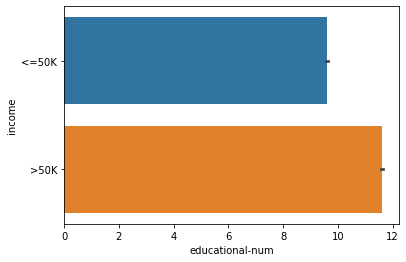

In [27]:
sns.barplot(x='educational-num',y='income',data=df)

<b>this graph describes the chances of higher salary is more with more number of years of education, may not be true in all cases. </b>

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


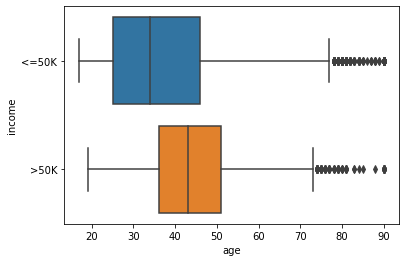

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


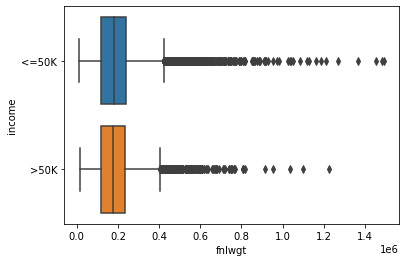

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


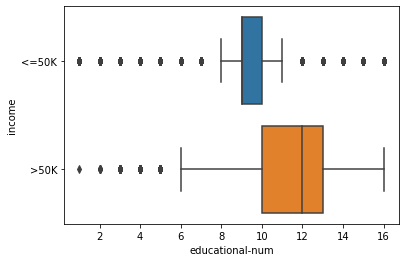

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


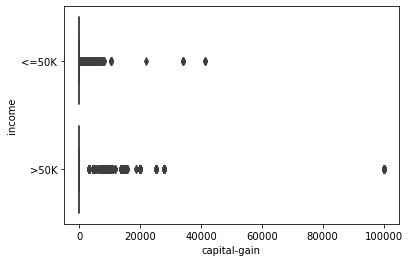

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


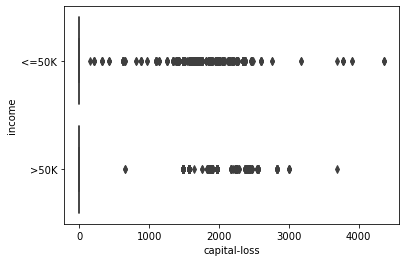

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


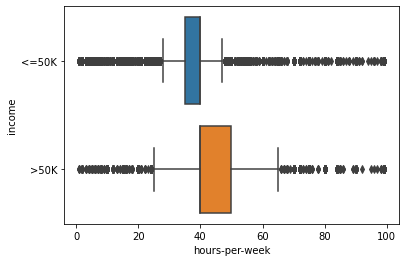

In [30]:
for i in numeric_column:
    sns.boxplot(df[i],y=df['income'])
    plt.show()

<b> in the above graphs we can observe that only educational-num graph has less outliers

the graph hours-per-week has most amount of outliers </b>

<AxesSubplot:xlabel='gender', ylabel='capital-gain'>

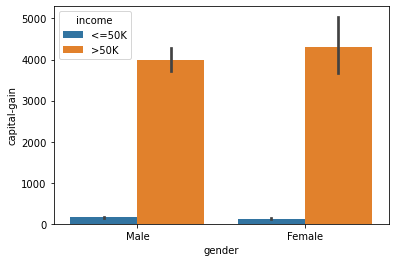

In [31]:
sns.barplot(x='gender',y='capital-gain',hue='income',data=df)

<b> here we can say that there is a linear relationship between capital-gain and income, in addition to that the people who has higher capital-gain has more income as compared to the people has lower capital-gain. </b>

<AxesSubplot:xlabel='hours-per-week', ylabel='income'>

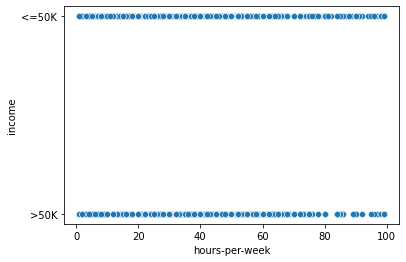

In [32]:
sns.scatterplot(x='hours-per-week',y='income',data=df)

<b> from above graph we can say that there is nothing like the people who work for more hour get high salary. </b>

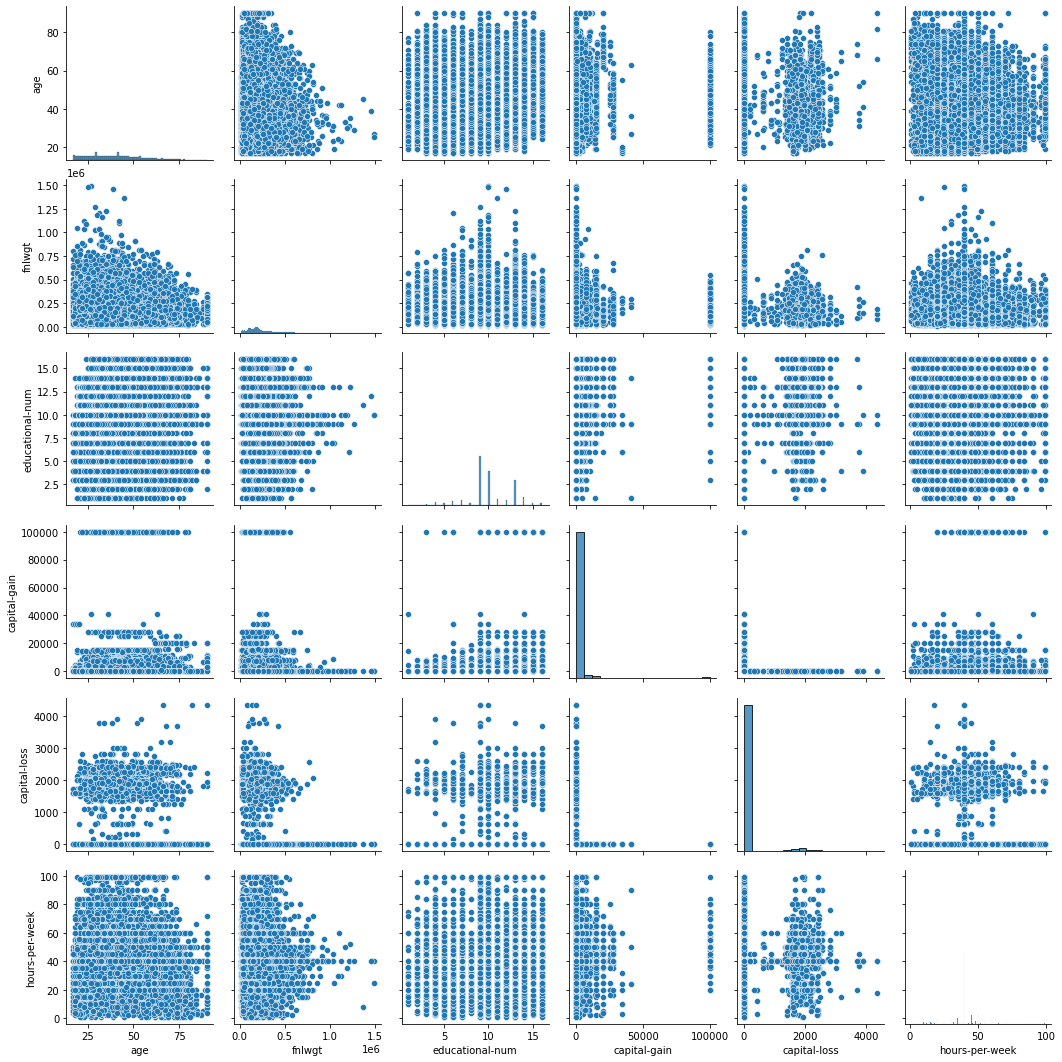

In [33]:
sns.pairplot(df)

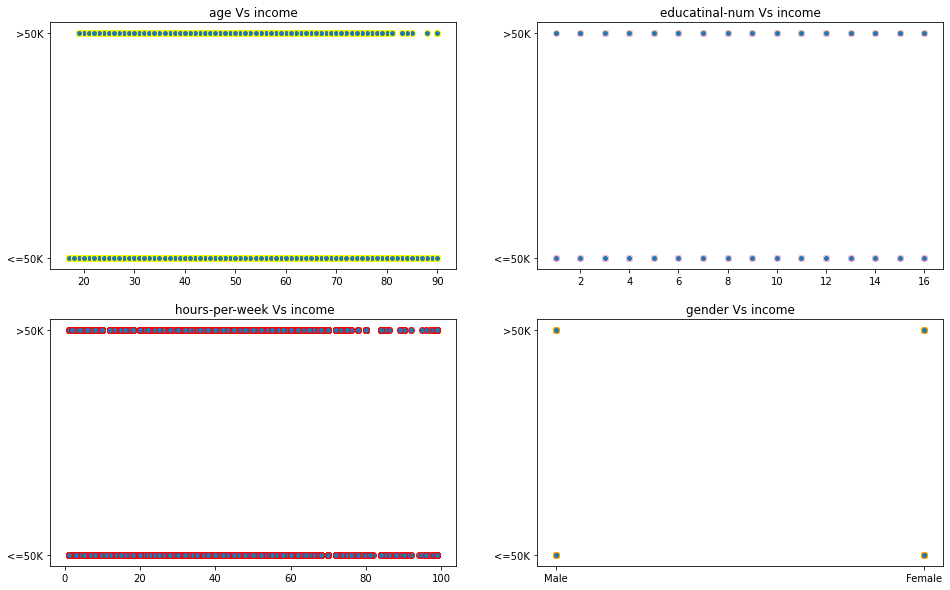

In [35]:
plt.figure(figsize=(16,10))


plt.subplot(2,2,1)
plt.scatter(df['age'],df['income'], edgecolors='yellow')
plt.title('age Vs income');


plt.subplot(2,2,2)
plt.scatter(df['educational-num'], df['income'], edgecolors='pink')
plt.title('educatinal-num Vs income');


plt.subplot(2,2,3)
plt.scatter(df['hours-per-week'],df['income'], edgecolors='red')
plt.title(' hours-per-week Vs income');

plt.subplot(2,2,4)
plt.scatter(df['gender'],df['income'], edgecolors='orange')
plt.title('gender Vs income');


plt.show()

In [36]:
country_count = df['native-country'].value_counts()

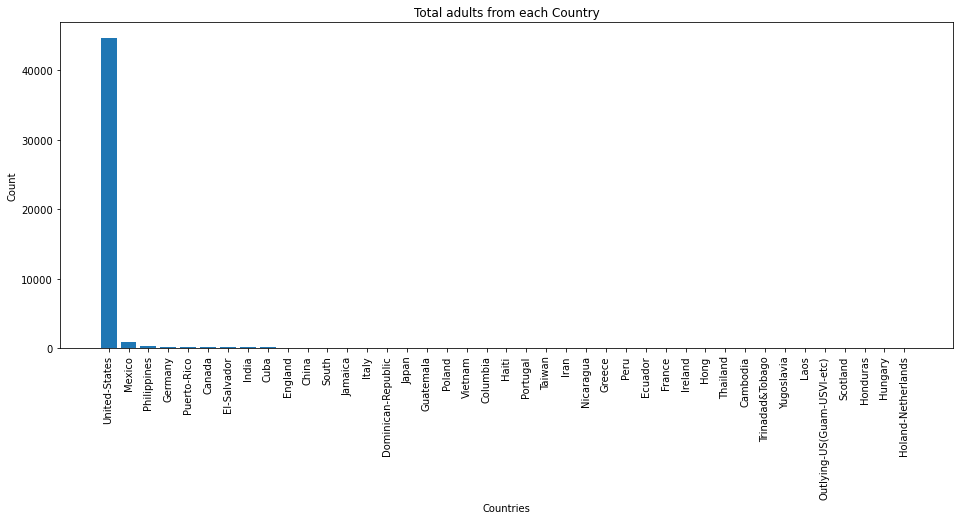

In [37]:
plt.figure(figsize=(16,6))
plt.bar(country_count.index, country_count.values);
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country');

<b> The majority of adults are from United States. Thus, we can distribute the column with values as either United States or Other. </b>

In [38]:
df = df[(stats.zscore(df['capital-gain'])>-3) & (stats.zscore(df['capital-gain'])<3)]

In [39]:
df = df[(stats.zscore(df['capital-loss'])>-3) & (stats.zscore(df['capital-loss'])<3)]

In [40]:
df['capital'] = df['capital-gain'] - df['capital-loss']

In [41]:
lim=np.percentile(df['capital'],95)
df = df[df['capital'] <= lim] 

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital', ylabel='Density'>

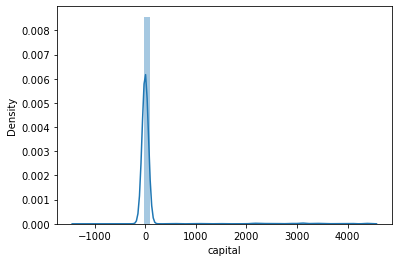

In [43]:
sns.distplot(df['capital'])

In [45]:
df = df[(stats.zscore(df['hours-per-week'])>-3) & (stats.zscore(df['hours-per-week'])<3)]

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

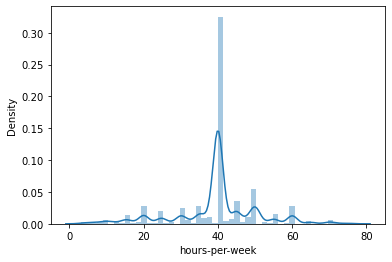

In [46]:
sns.distplot(df['hours-per-week'])

C:\Users\Sikha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

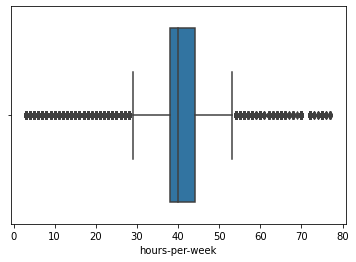

In [47]:
sns.boxplot(df['hours-per-week'])

In [11]:
X = df.drop(['income'], axis = 1)
X = pd.get_dummies(X)

In [12]:
y = df['income']

# Machine Learning Models

<b> Logistic Regression </b>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Sikha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = lr.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [32]:
confusion_matrix(y_test,y_pred)

array([[10496,   642],
       [ 2403,  1112]], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred)

0.7921927250392411

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

<b> Naive Bayes </b>

In [35]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_train_nb = nb.predict(X_train)

In [36]:
print('Accuracy:',accuracy_score(y_train,y_train_nb))
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_nb))

Accuracy: 0.7949925414607037
Confusion matrix:
 [[24665  1352]
 [ 5657  2515]]


In [37]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

In [38]:
print('Accuracy: ',accuracy_score(y_test,y_pred_nb))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_nb))

Accuracy:  0.7950590322800791
Confusion matrix: 
 [[10547   591]
 [ 2412  1103]]


<b> kNN </b>

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_knn  = knn.predict(X_train)

In [17]:
print('Accuracy:',accuracy_score(y_train,y_train_knn))
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_knn))

Accuracy: 0.8359706338295944
Confusion matrix:
 [[24787  1230]
 [ 4378  3794]]


In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn  = knn.predict(X_test)

In [19]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_knn))

Accuracy: 0.7762915443936396
Confusion matrix: 
 [[10193   945]
 [ 2333  1182]]


<b>Decision Tree</b>

In [20]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_train_dtree = tree.predict(X_train)

In [21]:
print('Accuracy:',accuracy_score(y_train,y_train_dtree))
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_dtree))

Accuracy: 0.9999415016525783
Confusion matrix:
 [[26017     0]
 [    2  8170]]


In [23]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [24]:
print('Accuracy:',accuracy_score(y_test,y_pred_tree))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_tree))

Accuracy: 0.8198321162901795
Confusion matrix:
 [[9795 1343]
 [1297 2218]]


<b> Random Forest </b>


In [25]:
r = RandomForestClassifier(n_estimators=100, criterion='entropy')
r.fit(X_train,y_train)
y_train_r = r.predict(X_train)

In [26]:
print('Accuracy: ',accuracy_score(y_train,y_train_r))
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_r))

Accuracy:  0.9998830033051567
Confusion matrix:
 [[26016     1]
 [    3  8169]]


In [27]:
r = RandomForestClassifier(n_estimators=100, criterion='entropy')
r.fit(X_train,y_train)
y_pred_r = r.predict(X_test)

In [28]:
print('Accuracy:',accuracy_score(y_test,y_pred_r))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_r))

Accuracy: 0.8522486862758479
Confusion matrix: 
 [[10312   826]
 [ 1339  2176]]


<b> Random Forest is best algorithm for Predecting the Income </b>

# Comparing Models

In [39]:
print('Logistic Regression')
print('Accuracy:',accuracy_score(y_test,y_pred))

print('Naive Bayes')
print('Accuracy:',accuracy_score(y_test,y_pred_nb))

print('KNN')
print('Accuracy:',accuracy_score(y_test,y_pred_knn))

print('Decision Tree')
print('Accuracy:',accuracy_score(y_test,y_pred_tree))

print('Random Forest')
print('Accuracy:',accuracy_score(y_test,y_pred_r))






Logistic Regression
Accuracy: 0.7921927250392411
Naive Bayes
Accuracy: 0.7950590322800791
KNN
Accuracy: 0.7762915443936396
Decision Tree
Accuracy: 0.8198321162901795
Random Forest
Accuracy: 0.8522486862758479


<b> here we can observe that random forest algorithm is ore accurate compared to the other four algorithms </b>